In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Random Dataset and Plotting the Points

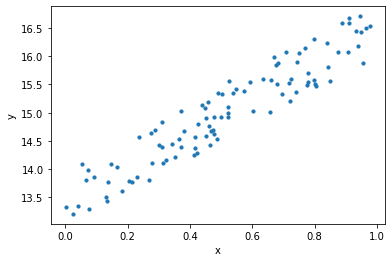

In [2]:
np.random.seed(7)
x = np.random.rand(100, 1)
y = 13 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Train Test Split

In [3]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3)



# Fit the Model 
## Getting Values of m and c from the model

In [4]:
def fit(X_train, Y_train):
   numerator = (X_train * Y_train).mean() - X_train.mean() * Y_train.mean()
   denominator = (X_train ** 2).mean() - X_train.mean() ** 2
   m = numerator / denominator
   c = Y_train.mean() - m * X_train.mean()
   return m, c


# Predicting Values using m and c

In [5]:
def predict(X_test, m, c):
   Y_pred = m * X_test + c
   return Y_pred


In [6]:
m, c = fit(X_train, Y_train)
y_pred = predict(X_test, m, c)
print("The value of m and c are:", m, c)


The value of m and c are: 3.179373534213082 13.345249192874231


# Calculating the accuracy score of the dataset

In [7]:
def score(Y_test, Y_pred):
   u = ((Y_test - Y_pred) ** 2).sum()
   v = ((Y_test - Y_test.mean()) ** 2).sum()
   r2 = 1 - u / v
   return r2

In [8]:
score(Y_test, y_pred)

0.9019146151426827

# Linear Regression Using Sklearn

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [10]:
Y_pred = lm.predict(X_test)
print(lm.score(X_test, Y_test))
print(lm.score(X_train,Y_train))

0.9019146151426825
0.8842863198257054
